<a href="https://colab.research.google.com/github/ankojha/test-repository/blob/master/LSTM_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler

import datetime

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

In [7]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [86]:
import yfinance as yf

In [155]:
symbol = 'AAPL'
end = datetime.date.today()
start = end.replace(year = 2010)


# Read data 
df = yf.download(symbol,start,end)

df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-26,149.660004,153.770004,149.639999,150.770004,150.770004,93339400
2022-09-27,152.740005,154.720001,149.949997,151.759995,151.759995,84442700
2022-09-28,147.639999,150.639999,144.839996,149.839996,149.839996,146691400
2022-09-29,146.100006,146.720001,140.679993,142.479996,142.479996,128138200
2022-09-30,141.279999,143.100006,138.000000,138.199997,138.199997,124705400


In [156]:
df['Close']

Date
2010-10-01     10.090000
2010-10-04      9.951429
2010-10-05     10.319286
2010-10-06     10.328214
2010-10-07     10.329286
                 ...    
2022-09-26    150.770004
2022-09-27    151.759995
2022-09-28    149.839996
2022-09-29    142.479996
2022-09-30    138.199997
Name: Close, Length: 3021, dtype: float64

In [157]:
Y = df['Close']

In [158]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [159]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-10-01,10.219643,10.235000,10.048214,10.090000,8.615163,448142800
2010-10-04,10.057143,10.103571,9.920357,9.951429,8.496850,435302000
2010-10-05,10.071429,10.337500,10.065000,10.319286,8.810935,501967200
2010-10-06,10.342500,10.428214,10.187857,10.328214,8.818561,670868800
2010-10-07,10.369286,10.374286,10.246786,10.329286,8.819473,408399600
...,...,...,...,...,...,...
2022-09-26,149.660004,153.770004,149.639999,150.770004,150.770004,93339400
2022-09-27,152.740005,154.720001,149.949997,151.759995,151.759995,84442700
2022-09-28,147.639999,150.639999,144.839996,149.839996,149.839996,146691400


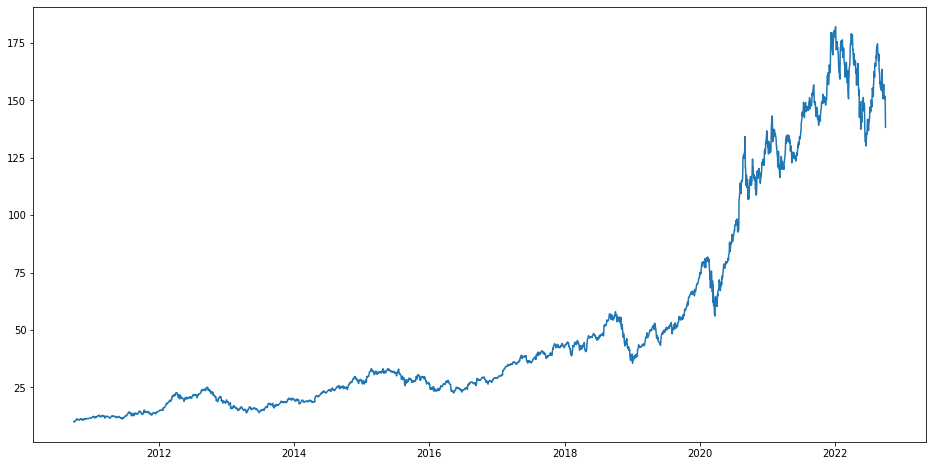

In [160]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [169]:
training_data = df.filter(['Close'])
dataset = training_data.values
training_len = int(np.ceil( len(dataset) * .95 ))
training_len

2870

In [170]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[8.05369877e-04],
       [0.00000000e+00],
       [2.13797540e-03],
       ...,
       [8.13028790e-01],
       [7.70252654e-01],
       [7.45377410e-01]])

In [171]:
train_data = scaled_data[0:int(training_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()


[array([0.00080537, 0.        , 0.00213798, 0.00218986, 0.00219609,
       0.00320281, 0.00347057, 0.00413065, 0.00446276, 0.00491319,
       0.00749329, 0.00816997, 0.00640354, 0.00661942, 0.00640977,
       0.00598425, 0.00626862, 0.00610465, 0.00605898, 0.00552137,
       0.00463712, 0.00530134, 0.00637656, 0.0070906 , 0.00822602,
       0.00798938, 0.00829867, 0.00777144, 0.0081762 , 0.00788976,
       0.00610049, 0.005895  , 0.00476374, 0.00453749, 0.00618352,
       0.00583065, 0.00720685, 0.00624579, 0.00750574, 0.00754726,
       0.00793542, 0.00674811, 0.00783786, 0.00820111, 0.00805373,
       0.00861625, 0.00821356, 0.00879476, 0.0085353 , 0.00870135,
       0.00893175, 0.00864531, 0.00865984, 0.00884457, 0.00871173,
       0.00904384, 0.00945691, 0.00965617, 0.00933237, 0.00955654])]
[0.009720525422948892]

[array([0.00080537, 0.        , 0.00213798, 0.00218986, 0.00219609,
       0.00320281, 0.00347057, 0.00413065, 0.00446276, 0.00491319,
       0.00749329, 0.00816997, 0.0

In [172]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [173]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [192]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

2810/2810 [==============================] - 112s 38ms/step - loss: 0.0010


In [193]:
test_data = scaled_data[training_len - 60: , :]
x_test = []
y_test = dataset[training_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7.021445528023365

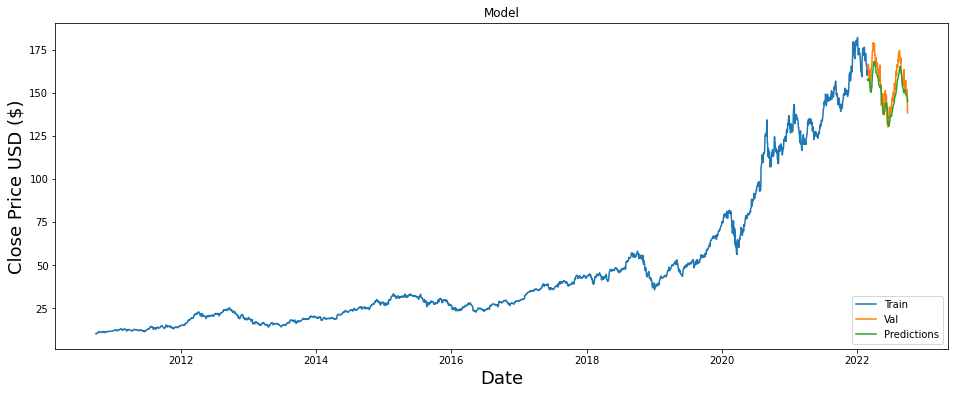

In [194]:
train = training_data[:training_len]
valid = training_data[training_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()